# Final Project Report

In [1]:
# Loading packages

library(tidyverse)
library(repr)
library(janitor)
library(lubridate)
library(tidymodels)
library(themis)
library(GGally)

set.seed(2025)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ──────

# Loading the Dataset

In [2]:
# Loading players.csv and sessions.csv

sessions_url<-"https://raw.githubusercontent.com/adamcheng7/DSCI-100-Final-Project-Report/refs/heads/main/data/sessions.csv"
players_url<-"https://raw.githubusercontent.com/adamcheng7/DSCI-100-Final-Project-Report/refs/heads/main/data/players.csv"

sessions_data<-read_csv(sessions_url)|>clean_names()
players_data<-read_csv(players_url)|>clean_names()

head(sessions_data)
head(players_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# Cleaning

In [3]:
# Cleaning players.csv

players_cleaned<-players_data|>
    select(hashed_email,subscribe,played_hours,age)

# Cleaning sessions.csv

## Separating start_time into year, month, day, hour, and minute
sessions_select<-sessions_data|>
    select(hashed_email,start_time,end_time)

sessions_tidy<-sessions_select|>
    separate(start_time,into=c("start_day","start_month","start_year_time"),sep="/")|>
    separate(start_year_time,into=c("start_year","start_time"),sep=" ")|>
    separate(start_time,into=c("start_hour","start_minute"),sep=":")

## Separating end_time into year, month, day, hour, and minute
sessions_tidy<-sessions_tidy|>
    separate(end_time,into=c("end_day","end_month","end_year_time"),sep="/")|>
    separate(end_year_time,into=c("end_year","end_time"),sep=" ")|>
    separate(end_time,into=c("end_hour","end_minute"),sep=":")

## Rearranging columns and converting time variables to numeric
sessions_cleaned<-sessions_tidy|>
    select(hashed_email,
           start_year,start_month,start_day,start_hour,start_minute,
           end_year,end_month,end_day,end_hour,end_minute
          )|>
    mutate(across(start_year:end_minute,as.numeric))

head(sessions_cleaned)
head(players_cleaned)

hashed_email,start_year,start_month,start_day,start_hour,start_minute,end_year,end_month,end_day,end_hour,end_minute
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,6,30,18,12,2024,6,30,18,24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024,6,17,23,33,2024,6,17,23,46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024,7,25,17,34,2024,7,25,17,57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,7,25,3,22,2024,7,25,3,58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024,5,25,16,1,2024,5,25,16,12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024,6,23,15,8,2024,6,23,17,10


hashed_email,subscribe,played_hours,age
<chr>,<lgl>,<dbl>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE,30.3,9
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE,3.8,17
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE,0.0,17
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,TRUE,0.7,21
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,TRUE,0.1,21
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,TRUE,0.0,17


# Wrangling

In [4]:
# Wrangling datasets to complete format

merged_data <- sessions_cleaned |>
    mutate(start_datetime = make_datetime(start_year, start_month, start_day, start_hour, start_minute),
           end_datetime = make_datetime(end_year, end_month, end_day, end_hour, end_minute),
           time_elapsed = as.numeric(difftime(end_datetime, start_datetime, units = "hours"))
          ) |>
    group_by(hashed_email) |>
    summarize(sessions_played = n(),
              avg_session_hours = round(mean(time_elapsed, na.rm = TRUE), 2)
             ) |>
    full_join(players_cleaned, join_by(hashed_email))

complete_data <- merged_data |>
    mutate(sessions_played = replace_na(sessions_played, 0),
           avg_session_hours = replace_na(avg_session_hours, 0),
           subscription_status = factor(subscribe, 
                                         levels = c(TRUE, FALSE), 
                                         labels = c("Subscribed", "Not Subscribed"))
          ) |>
    select(-subscribe, -hashed_email) |> # Removing identifier columns
    filter(!is.na(age))  # This line removes the two observations that had missing values in 'age'

head(complete_data)

sessions_played,avg_session_hours,played_hours,age,subscription_status
<int>,<dbl>,<dbl>,<dbl>,<fct>
2,0.88,1.5,20,Subscribed
1,0.50,0.4,21,Not Subscribed
1,0.18,0.1,17,Subscribed
13,0.54,5.6,17,Subscribed
2,0.58,1.0,17,Subscribed
1,0.17,0.1,19,Not Subscribed


# Summary

Variables to describe:
- `sessions_played`:
- `avg_session_hours`:
- `played_hours`:
- `age`:

In [5]:
# Aggregate summary

subscription_proportions <- complete_data |>
                      group_by(subscription_status) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(complete_data))

subscription_proportions

subscription_status,n,percent
<fct>,<int>,<dbl>
Subscribed,142,73.19588
Not Subscribed,52,26.80412


# Visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


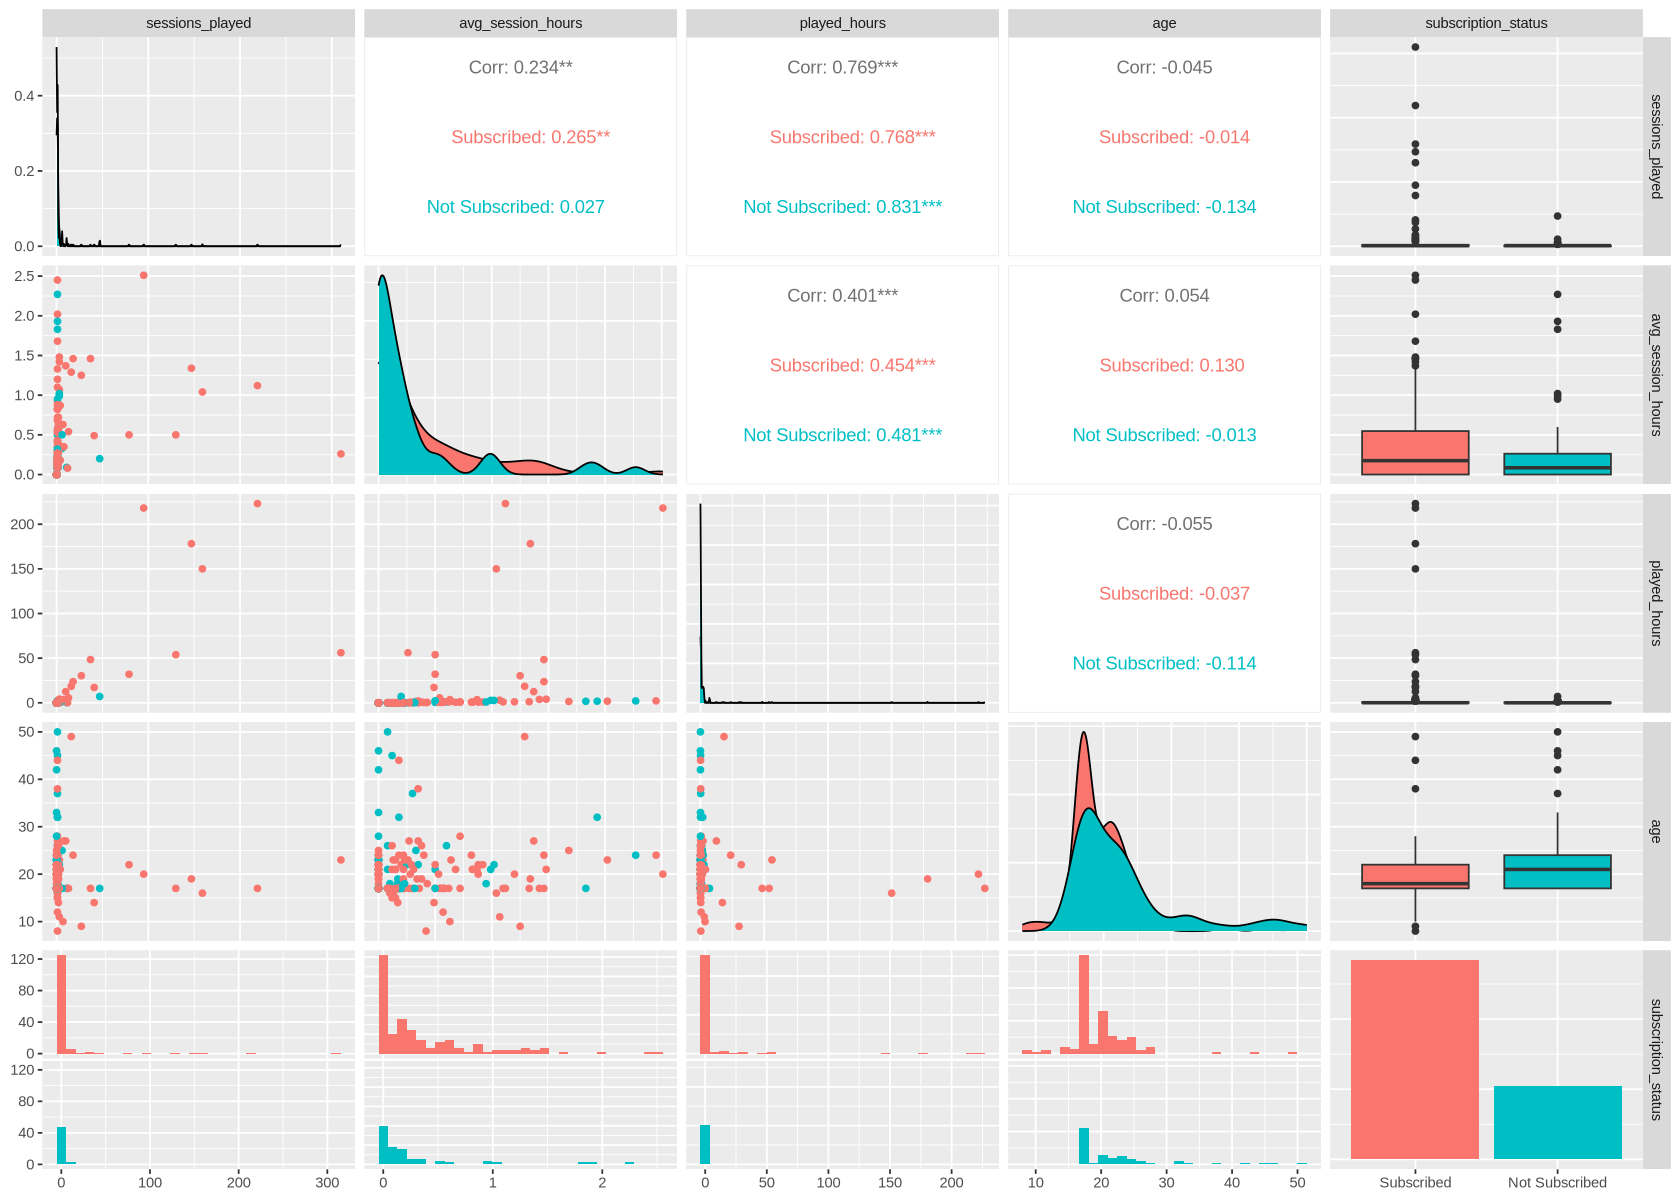

In [6]:
options(repr.plot.height=10,repr.plot.width=14)

# Pair plot
ggpairs(complete_data, mapping = aes(color=subscription_status))

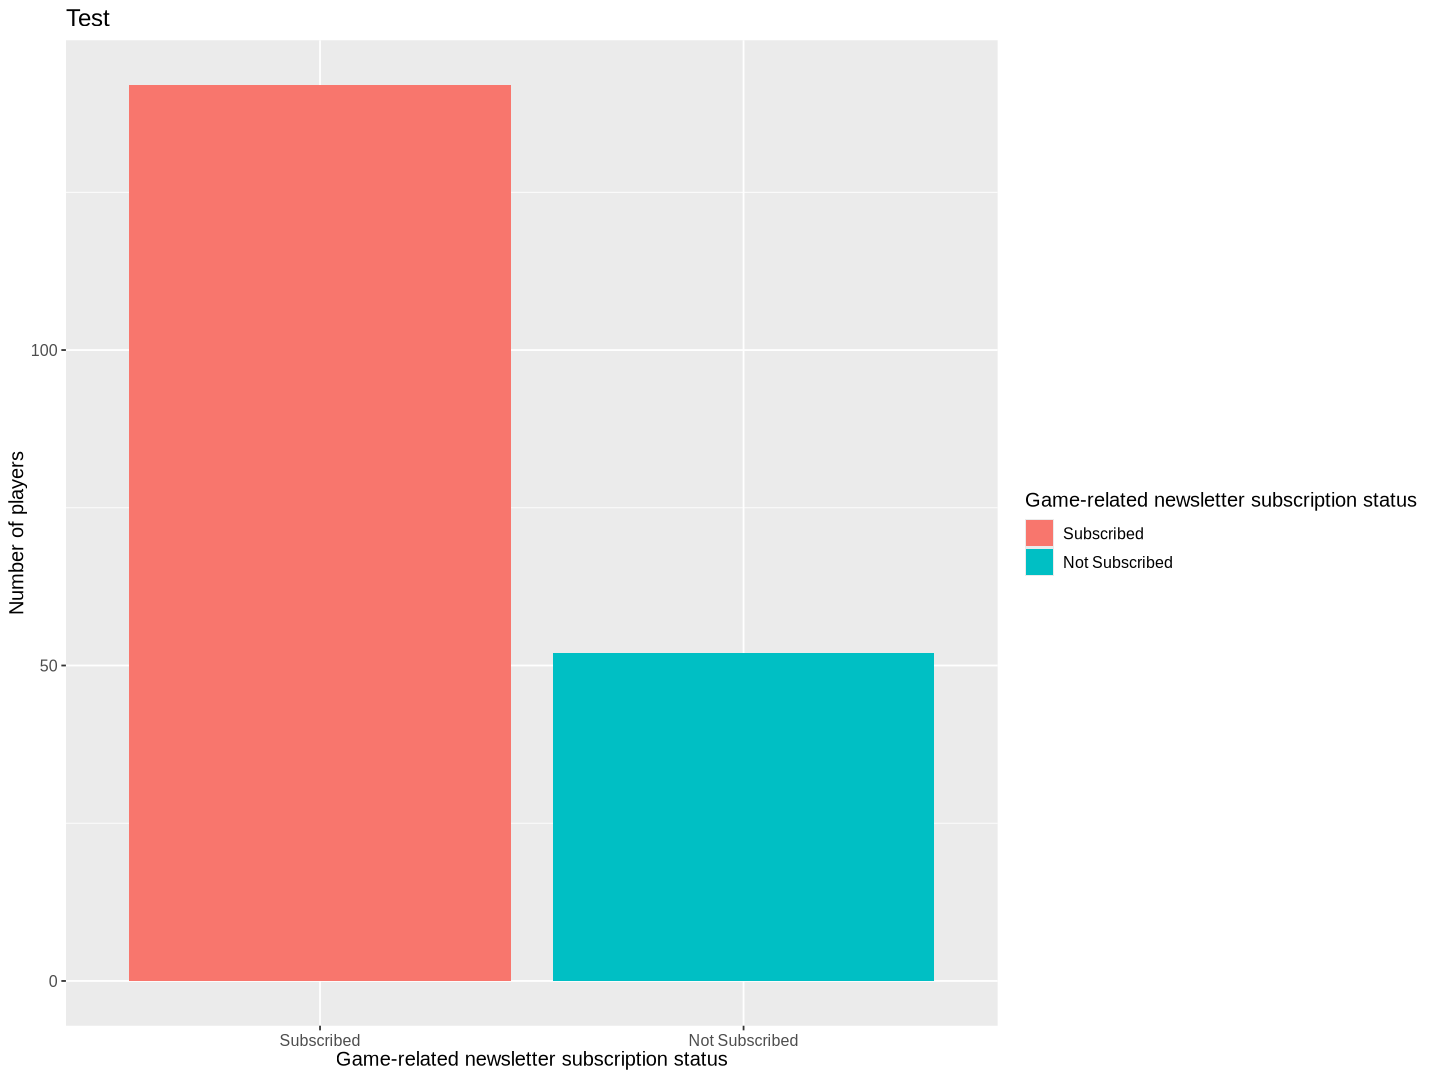

In [7]:
options(repr.plot.width=12,repr.plot.height=9)

# Class balance diagnosis bar chart
class_balance<-complete_data|>
    ggplot(aes(x=subscription_status,fill=subscription_status))+
    geom_bar()+
    labs(
        x="Game-related newsletter subscription status",
        y="Number of players",
        title="Test",
        fill="Game-related newsletter subscription status"
        )+
    theme(text=element_text(size=12))

class_balance

Insights:
- Class imbalance between non-subscribers and subscribers
- Subscribers tend to experience relatively higher values for all predictors
- Non-subscribers tend to experience lower values for all predictors

# Data Analysis

In [8]:
# Ensuring reproducibility
set.seed(999)

# Selecting predictors. Change to alter predictor combinations if needed
predictors<-c("avg_session_hours", "sessions_played", "played_hours", "age")
mc_data<-complete_data|>
    select(all_of(predictors),subscription_status)

# Splitting dataset
mc_split <- initial_split(mc_data,prop=0.75,strata=subscription_status)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

# Creating recipe. Upsampling non-subscribers up to 1:1 ratio due to significant class imbalance
mc_recipe <- recipe(subscription_status~.,data=mc_train)|>
    step_upsample(subscription_status, over_ratio = 1, skip = TRUE) |>
    step_scale(all_predictors())|>
    step_center(all_predictors())

# 5-fold cross validation and selecting range of neighbors (1-30)
mc_vfold<-vfold_cv(mc_train,v=5,strata=subscription_status)
mc_neighbors<-tibble(neighbors=seq(from=1,to=30,by=1))

# Tuning knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Producing estimated accuracy metric
mc_tune<- workflow()|>
    add_model(knn_spec)|>
    add_recipe(mc_recipe)|>
    tune_grid(resamples=mc_vfold,grid=mc_neighbors)|>
    collect_metrics()|>
    filter(.metric=="accuracy")

head(mc_tune)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7033005,5,0.03567788,Preprocessor1_Model01
2,accuracy,binary,0.6961741,5,0.04045598,Preprocessor1_Model02
3,accuracy,binary,0.6749918,5,0.04962767,Preprocessor1_Model03
4,accuracy,binary,0.7025780,5,0.03748006,Preprocessor1_Model04
5,accuracy,binary,0.6890476,5,0.05511287,Preprocessor1_Model05
6,accuracy,binary,0.6821511,5,0.06161438,Preprocessor1_Model06


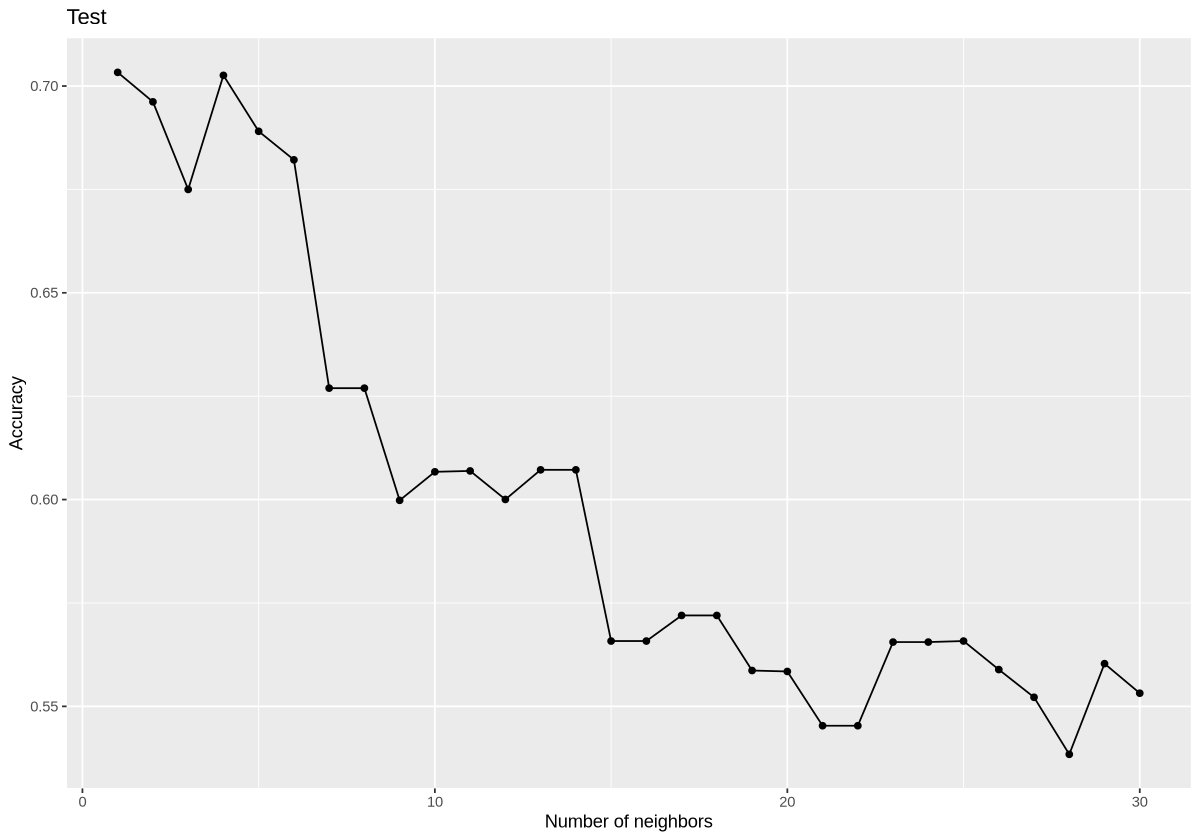

In [9]:
# Plotting estimated accuracy vs. K

options(repr.plot.height=7,repr.plot.width=10)

cross_val_plot<-mc_tune|>
    ggplot(aes(x=neighbors,y=mean))+
    geom_point()+
    geom_line()+
    labs(x="Number of neighbors",y="Accuracy",title="Test")

cross_val_plot

# Choosing a K of 5 based on results

In [10]:
# Predicting test data using chosen K of 5

# Creating new model specification with tuned K (5)
tuned_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

# Creating new workflow with the new model specification
mc_fit<-workflow()|>
    add_recipe(mc_recipe)|>
    add_model(tuned_spec)|>
    fit(data=mc_train)

# Predicting test data
mc_predictions<-mc_fit|>
    predict(mc_test)|>
    bind_cols(mc_test)

head(mc_predictions)

.pred_class,avg_session_hours,sessions_played,played_hours,age,subscription_status
<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>
Not Subscribed,0.30,1,0.2,37,Not Subscribed
Subscribed,0.38,2,0.6,19,Subscribed
Subscribed,0.72,2,1.2,17,Subscribed
Not Subscribed,0.08,1,0.0,26,Not Subscribed
Subscribed,0.18,4,0.3,17,Subscribed
Subscribed,0.15,1,0.1,15,Subscribed


In [11]:
# Computing accuracy
mc_metrics<-mc_predictions|>
    metrics(truth=subscription_status,estimate=.pred_class)|>
    filter(.metric=="accuracy")

mc_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7755102


In [12]:
# Generating confusion matrix
mc_conf_mat<-mc_predictions|>
    conf_mat(truth=subscription_status,estimate=.pred_class)
    
mc_conf_mat

                Truth
Prediction       Subscribed Not Subscribed
  Subscribed             32              7
  Not Subscribed          4              6

In [13]:
# Computing precision and accuracy for both classes

# Numeric values from confusion matrix
TP_subscribed <- 32  # True positives for Subscribed
FP_subscribed <- 7   # False positives for Subscribed
FN_subscribed <- 4   # False negatives for Subscribed
TN_subscribed <- 6   # True negatives for Subscribed

# Compute precision and recall for both classes
precision_subscribed <- round(TP_subscribed / (TP_subscribed + FP_subscribed), 2)
recall_subscribed <- round(TP_subscribed / (TP_subscribed + FN_subscribed), 2)

precision_not_subscribed <- round(TN_subscribed / (TN_subscribed + FN_subscribed), 2)
recall_not_subscribed <- round(TN_subscribed / (TN_subscribed + FP_subscribed), 2)

# Create tibble with precision and recall
mc_precision_recall <- tibble(
  `Class Assumed Positive` = c("Subscribed", "Not Subscribed"),
  Precision = c(precision_subscribed, precision_not_subscribed),
  Recall = c(recall_subscribed, recall_not_subscribed)
)

mc_precision_recall

Class Assumed Positive,Precision,Recall
<chr>,<dbl>,<dbl>
Subscribed,0.82,0.89
Not Subscribed,0.60,0.46


# Visualizing Results

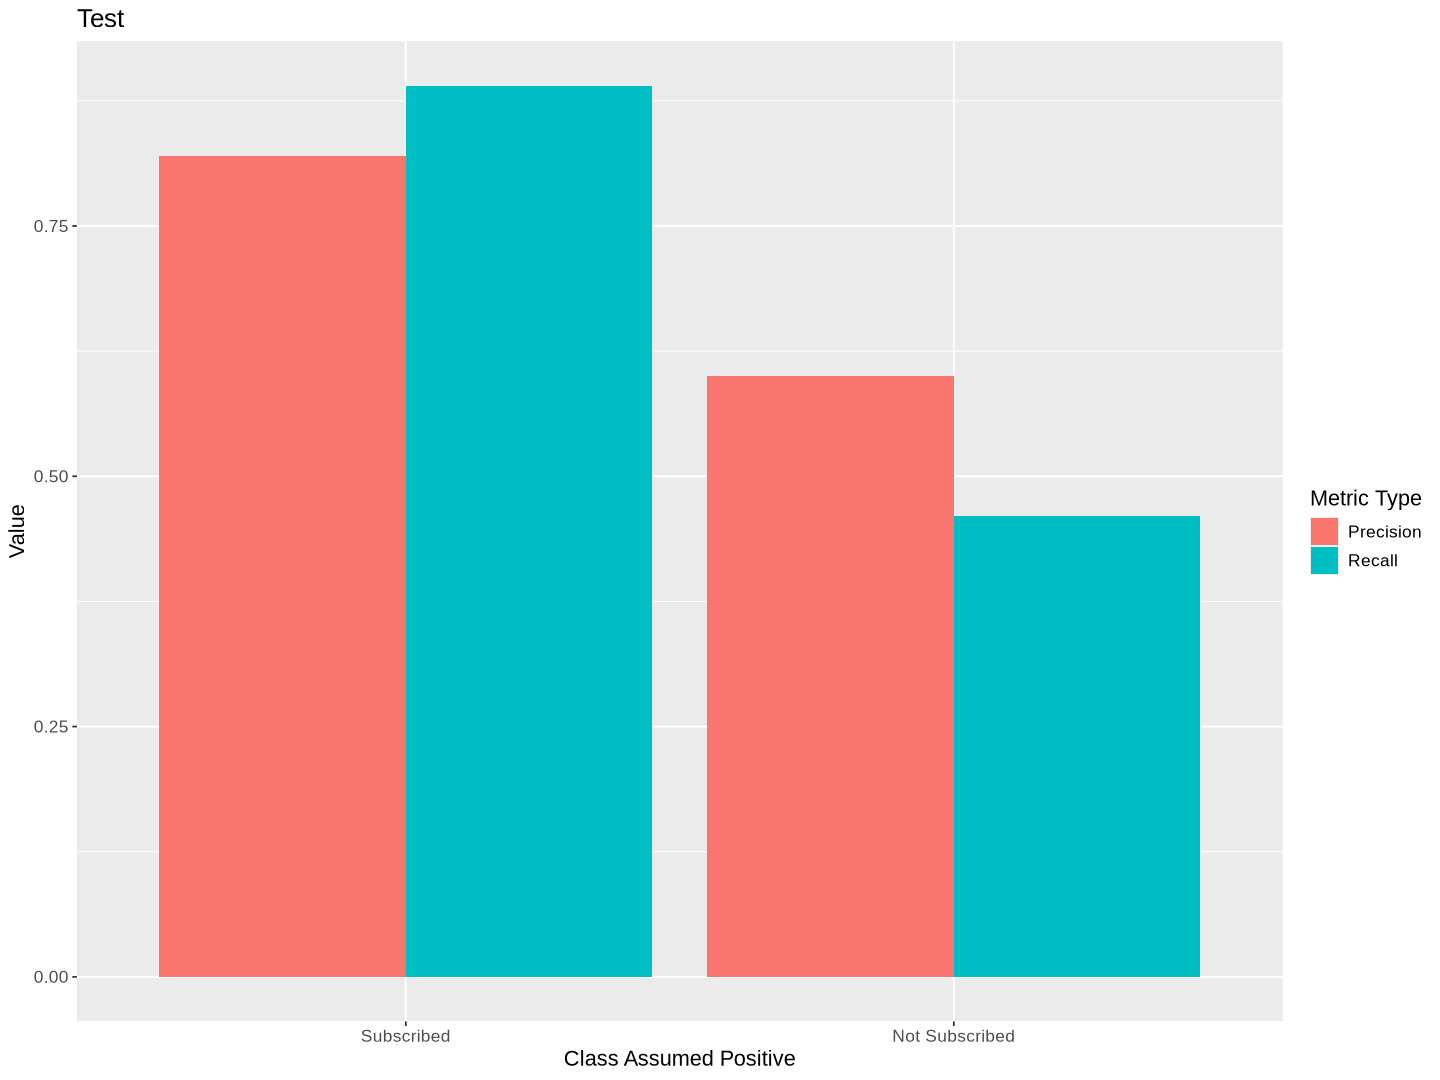

In [14]:
options(repr.plot.width=12,repr.plot.height=9)

mc_precision_recall_longer<-mc_precision_recall|>
    pivot_longer(cols=Precision:Recall,names_to="type",values_to="value")

mc_recall_precision_plot<-mc_precision_recall_longer|>
    ggplot(aes(x=fct_reorder(as_factor(`Class Assumed Positive`),value,.desc = TRUE),y=value,fill=type))+
    geom_bar(stat="identity",position="dodge")+
    labs(x="Class Assumed Positive",y="Value",fill="Metric Type",title="Test")+
    theme(text = element_text(size = 13))

mc_recall_precision_plot

# Insights

- The model is significantly better at predicting "Subscribed" users than "Not subscribed" users. This is likely due to class imbalance, with non-subscribers having less of the valuable data to train the model. Moreover, upsampling does not offer more data and insights about non-subscribers' traits to the $k$-nn model.